In [93]:
import numpy as np
from PIL import Image
import matplotlib.image as img
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import train_test_split
import seaborn as sns
import copy
import h5py

# 1) transforming images  into 100 * 100 pixels

In [94]:

# for index,filename in enumerate(os.listdir("animals/panda")):
#     pic = Image.open("animals/panda/"+filename)
#     pic = pic.resize((100,100))
#     pic.save(f"animals/resized_panda/resized_{index}.jpg")

In [95]:
# #dir="animals/cats"
# dir="animals/dogs"
# for index,filename in enumerate(os.listdir(dir)):
#     pic = Image.open(dir+"/"+filename)
#     pic = pic.resize((100,100))
#     pic.save(f"animals/resized_panda/others_{index+501}.jpg")
#     if index==500:
#         break
 
 

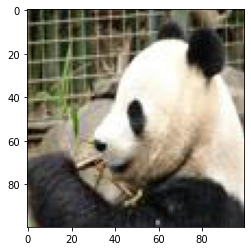

In [96]:
#resizing any image
pandas_directory = "D:/projects/A.i specialization/first course/week2/animals_images/resized_panda"
g = Image.open(pandas_directory + "/resized_1.jpg")
plt.imshow(g)


# showcasing data

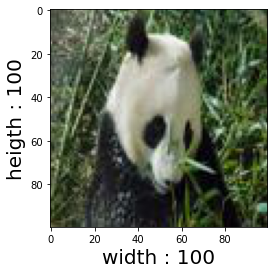

In [97]:
i='32'
pic = img.imread(pandas_directory +f"/resized_{i}.jpg")
plt.xlabel(f"width : {pic.shape[1]}",fontsize=20)
plt.ylabel(f"heigth : {pic.shape[0]}",fontsize=20)
plt.imshow(pic)


In [98]:
pic

array([[[ 81,  85,  71],
        [ 84,  88,  74],
        [ 98, 102,  88],
        ...,
        [ 61,  84,  58],
        [ 40,  63,  37],
        [ 40,  63,  37]],

       [[ 81,  85,  71],
        [ 80,  84,  70],
        [ 89,  93,  79],
        ...,
        [ 81,  99,  75],
        [ 49,  67,  43],
        [ 35,  53,  29]],

       [[ 73,  77,  63],
        [ 72,  76,  62],
        [ 78,  82,  68],
        ...,
        [111, 125, 100],
        [ 85,  99,  74],
        [ 48,  62,  37]],

       ...,

       [[ 52,  53,  22],
        [ 50,  51,  20],
        [ 65,  65,  37],
        ...,
        [  9,  13,   0],
        [ 34,  38,  23],
        [ 50,  52,  38]],

       [[ 90,  91,  60],
        [ 69,  70,  39],
        [ 59,  59,  31],
        ...,
        [  0,   3,   0],
        [ 15,  19,   4],
        [ 29,  31,  17]],

       [[117, 118,  87],
        [ 96,  97,  66],
        [ 84,  84,  56],
        ...,
        [ 17,  21,   6],
        [ 26,  28,  14],
        [ 38,  39,  25]]

# turn images into a standalone Array

In [99]:
data=[]
labels=[]
for filename in os.listdir(pandas_directory):
    if filename[0]!='r':
        labels.append(0)
    else:
        labels.append(1)
    data.append(img.imread(pandas_directory+"/"+filename))
    


In [100]:
len(data)

2003

In [101]:
for i,val in enumerate(data):
    if val.shape!=(100,100,3):
        data.pop(i)
        labels.pop(i)

In [102]:
data=np.asarray(data)

1


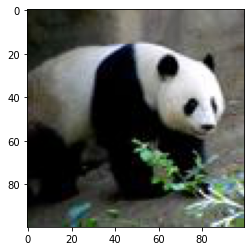

In [103]:
i=1002
plt.imshow(data[i])
print(labels[i])

In [104]:
data_flatten=data.reshape(data.shape[0],-1)

In [105]:
data_flatten=data_flatten/255.

In [106]:
print(data_flatten)

[[0.31764706 0.52941176 0.63921569 ... 0.22352941 0.16470588 0.09019608]
 [0.38823529 0.38823529 0.48235294 ... 0.28235294 0.26666667 0.25490196]
 [0.45882353 0.50980392 0.4        ... 0.65098039 0.64313725 0.55294118]
 ...
 [0.18039216 0.37647059 0.48235294 ... 0.4        0.43137255 0.34901961]
 [0.16470588 0.11372549 0.09019608 ... 0.25098039 0.25882353 0.20392157]
 [0.63921569 0.65882353 0.56862745 ... 0.2745098  0.27843137 0.29803922]]


In [107]:
len(data_flatten)

1996

# splitting data into training and testing

In [108]:
X_train, X_test, y_train , y_test = train_test_split(data_flatten, labels, test_size=0.33,random_state=42)

In [109]:
(len(y_test) - sum(y_test))/len(y_test)

0.5007587253414264

In [110]:
X_train = X_train.T
X_test = X_test.T
y_train = np.asarray(y_train).reshape((1,len(y_train)))
y_test = np.asarray(y_test).reshape((1,len(y_test)))

In [111]:
y_train.shape

(1, 1337)

(1, 1337)
0


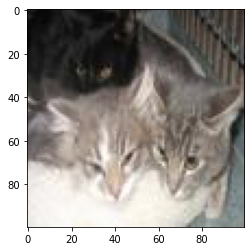

In [112]:
sample= 356
Rs = np.asarray(X_train.T[sample].reshape((100,100,3))*255)
Rs = Rs.astype("int")
plt.imshow(Rs)
print(y_train.shape)
print(y_train[0][sample])

In [113]:
np.max(X_train[0]*255)

255.0

# creating model functions (Logistic Regression)

#  sigmoid function

In [114]:
def sigmoid(x):
    return 1/( 1+ (1/ np.exp(x)) )

In [115]:
a=np.array([-0.5,0.7,0.32])
sigmoid(a)

array([0.37754067, 0.66818777, 0.57932425])

# initialize weights and biases

In [116]:
def initialize_weigths_bias(dim):
    return np.zeros((dim,1)) , 0.0
    

In [117]:
def initialize_with_zeros_test(target):
    dim = 3
    w, b = target(dim)
    assert type(b) == float, f"Wrong type for b. {type(b)} != float"
    assert b == 0., "b must be 0.0"
    assert type(w) == np.ndarray, f"Wrong type for w. {type(w)} != np.ndarray"
    assert w.shape == (dim, 1), f"Wrong shape for w. {w.shape} != {(dim, 1)}"
    assert np.allclose(w, [[0.], [0.], [0.]]), f"Wrong values for w. {w} != {[[0.], [0.], [0.]]}"
    print('\033[92mAll tests passed!')
initialize_with_zeros_test(initialize_weigths_bias)

All tests passed!


# forward & backward propogation

In [118]:
def propagation(x,y,w,b):
    
    m = x.shape[1]
   
    Z = np.dot(w.T,x) + b
    
    

    
    A = sigmoid(Z)
    
    cost = (-1/m)*  np.sum(y * np.log(A) + (1-y) * np.log(1-A)  )

    
    dZ = A-y
    
    dw = (1/m) * np.dot(x,dZ.T) 
    
    db = (1/m) *np.sum(dZ)
    
    print(dw.shape)
    cost =np.squeeze(np.array(cost))

    grads = {"dw": dw,
             "db": db}
    
    return grads , cost
    
    
    

In [119]:
w =  np.array([[1.], [2]])
b = 1.5
X = np.array([[1., -2., -1.], [3., 0.5, -3.2]])
Y = np.array([[1, 1, 0]])
grads, cost = propagation(X,Y,w,b)

assert type(grads["dw"]) == np.ndarray
assert grads["dw"].shape == (2, 1)
assert type(grads["db"]) == np.float64


print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))
print ("cost = " + str(cost))

def propagate_test(target):
    w, b = np.array([[1.], [2.], [-1]]), 2.5, 
    X = np.array([[1., 2., -1., 0], [3., 4., -3.2, 1], [3., 4., -3.2, -3.5]])
    Y = np.array([[1, 1, 0, 0]])

    expected_dw = np.array([[-0.03909333], [ 0.12501464], [-0.99960809]])
    expected_db = np.float64(0.288106326429569)
    expected_grads = {'dw': expected_dw,
                      'db': expected_db}
    expected_cost = np.array(2.0424567983978403)
    expected_output = (expected_grads, expected_cost)
    
    grads, cost = target(  X, Y, w, b)

    assert type(grads['dw']) == np.ndarray, f"Wrong type for grads['dw']. {type(grads['dw'])} != np.ndarray"
    assert grads['dw'].shape == w.shape, f"Wrong shape for grads['dw']. {grads['dw'].shape} != {w.shape}"
    assert np.allclose(grads['dw'], expected_dw), f"Wrong values for grads['dw']. {grads['dw']} != {expected_dw}"
    assert np.allclose(grads['db'], expected_db), f"Wrong values for grads['db']. {grads['db']} != {expected_db}"
    assert np.allclose(cost, expected_cost), f"Wrong values for cost. {cost} != {expected_cost}"
    print('\033[92mAll tests passed!')
    
    
propagate_test(propagation)

(2, 1)
dw = [[ 0.25071532]
 [-0.06604096]]
db = -0.1250040450043965
cost = 0.15900537707692405
(3, 1)
All tests passed!


# improve


In [120]:
def optimize(x,y,w,b,n_iter=100,alpha=0.1,print_cost=False):
    
    w = copy.deepcopy(w)
    b = copy.deepcopy(b)
    
    costs = []
    
    for i in range(n_iter):
        # (≈ 1 lines of code)
        # Cost and gradient calculation 
        grads, cost = propagation(x,y,w,b)
        # YOUR CODE STARTS HERE
        
        
        # YOUR CODE ENDS HERE
        
        # Retrieve derivatives from grads
        dw = grads["dw"]
        db = grads["db"]
            
        # update rule (≈ 2 lines of code)
        w = w - alpha * dw
        b = b - alpha * db
        # YOUR CODE STARTS HERE
        
        
        # YOUR CODE ENDS HERE
        # Record the costs
        if i % 100 == 0:
            costs.append(cost)
        
            # Print the cost every 100 training iterations
            if print_cost:
                print ("Cost after iteration %i: %f" %(i, cost))
    
    params = {"w": w,
              "b": b}
    
    grads = {"dw": dw,
             "db": db}
    
    return params, grads, costs
    


In [121]:
def optimize_test(target):
    w, b, X, Y = np.array([[1.], [2.]]), 2., np.array([[1., 2., -1.], [3., 4., -3.2]]), np.array([[1, 0, 1]])
    expected_w = np.array([[-0.70916784], [-0.42390859]])
    expected_b = np.float64(2.26891346)
    expected_params = {"w": expected_w,
                       "b": expected_b}
   
    expected_dw = np.array([[0.06188603], [-0.01407361]])
    expected_db = np.float64(-0.04709353)
    expected_grads = {"dw": expected_dw,
                      "db": expected_db}
    
    expected_cost = [5.80154532, 0.31057104]
    expected_output = (expected_params, expected_grads, expected_cost)
    
    params, grads, costs = target(X, Y,w, b ,  n_iter=101, alpha=0.1, print_cost=False)
    
    assert type(costs) == list, "Wrong type for costs. It must be a list"
    assert len(costs) == 2, f"Wrong length for costs. {len(costs)} != 2"
    assert np.allclose(costs, expected_cost), f"Wrong values for costs. {costs} != {expected_cost}"
    
    assert type(grads['dw']) == np.ndarray, f"Wrong type for grads['dw']. {type(grads['dw'])} != np.ndarray"
    assert grads['dw'].shape == w.shape, f"Wrong shape for grads['dw']. {grads['dw'].shape} != {w.shape}"
    assert np.allclose(grads['dw'], expected_dw), f"Wrong values for grads['dw']. {grads['dw']} != {expected_dw}"
    
    assert np.allclose(grads['db'], expected_db), f"Wrong values for grads['db']. {grads['db']} != {expected_db}"
    assert type(params['w']) == np.ndarray, f"Wrong type for params['w']. {type(params['w'])} != np.ndarray"
    assert params['w'].shape == w.shape, f"Wrong shape for params['w']. {params['w'].shape} != {w.shape}"
    assert np.allclose(params['w'], expected_w), f"Wrong values for params['w']. {params['w']} != {expected_w}"
    assert np.allclose(params['b'], expected_b), f"Wrong values for params['b']. {params['b']} != {expected_b}"

    
    print('\033[92mAll tests passed!')   
    
optimize_test(optimize)

(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
All tests passed!


# predict

In [122]:
def predict(w, b, x):
    
    
    m=x.shape[1]
    predictions = np.zeros((1,m))
    Z = np.dot(w.T,x) + b
    A = sigmoid(Z)
    
    for i in range(A.shape[1]):
        if A[0,i] <= 0.5 :
            predictions[0,i] = 0
        else:
            predictions[0,i] = 1
        
    
    return predictions
    

In [123]:
def predict_test(target):
    w = np.array([[0.3], [0.5], [-0.2]])
    b = -0.33333
    X = np.array([[1., -0.3, 1.5],[2, 0, 1], [0, -1.5, 2]])
    
    pred = target(w, b, X)
    
    assert type(pred) == np.ndarray, f"Wrong type for pred. {type(pred)} != np.ndarray"
    assert pred.shape == (1, X.shape[1]), f"Wrong shape for pred. {pred.shape} != {(1, X.shape[1])}"
    assert np.bitwise_not(np.allclose(pred, [[1., 1., 1]])), f"Perhaps you forget to add b in the calculation of A"
    assert np.allclose(pred, [[1., 0., 1]]), f"Wrong values for pred. {pred} != {[[1., 0., 1.]]}"
    
    print('\033[92mAll tests passed!')
    
predict_test(predict)

All tests passed!


# whole model 

In [124]:
def model (x_train,y_train,x_test,y_test,alpha=0.1,n_iter=1000,print_cost=False):
    
    w,b=initialize_weigths_bias(x_train.shape[0])
    params , grads , costs  = optimize(x_train,y_train,w,b,n_iter,alpha,print_cost)
    
    w=params["w"]
    
    b=params["b"]
    
    Y_prediction_train = predict(w,b,x_train)
    Y_prediction_test = predict(w,b,x_test)
    
    if print_cost:
        print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - y_train)) * 100))
        print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - y_test)) * 100))
    
    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : alpha,
         "num_iterations": n_iter}
    return d

In [125]:
def model_test(target):
    np.random.seed(0)
    
    expected_output = {'costs': [np.array(0.69314718)], 
                   'Y_prediction_test': np.array([[1., 1., 0.]]), 
                   'Y_prediction_train': np.array([[1., 1., 0., 1., 0., 0., 1.]]), 
                   'w': np.array([[ 0.08639757],
                           [-0.08231268],
                           [-0.11798927],
                           [ 0.12866053]]), 
                   'b': -0.03983236094816321}
    
    # Use 3 samples for training
    b, Y, X = 1.5, np.array([1, 0, 0, 1, 0, 0, 1]).reshape(1, 7), np.random.randn(4, 7),

    # Use 6 samples for testing
    x_test = np.random.randn(4, 3)
    y_test = np.array([0, 1, 0])

    d = target(X, Y, x_test, y_test, n_iter=50, alpha=0.01)
    
    assert type(d['costs']) == list, f"Wrong type for d['costs']. {type(d['costs'])} != list"
    assert len(d['costs']) == 1, f"Wrong length for d['costs']. {len(d['costs'])} != 1"
    assert np.allclose(d['costs'], expected_output['costs']), f"Wrong values for d['costs']. {d['costs']} != {expected_output['costs']}"
    
    assert type(d['w']) == np.ndarray, f"Wrong type for d['w']. {type(d['w'])} != np.ndarray"
    assert d['w'].shape == (X.shape[0], 1), f"Wrong shape for d['w']. {d['w'].shape} != {(X.shape[0], 1)}"
    assert np.allclose(d['w'], expected_output['w']), f"Wrong values for d['w']. {d['w']} != {expected_output['w']}"
    
    assert np.allclose(d['b'], expected_output['b']), f"Wrong values for d['b']. {d['b']} != {expected_output['b']}"
    
    assert type(d['Y_prediction_test']) == np.ndarray, f"Wrong type for d['Y_prediction_test']. {type(d['Y_prediction_test'])} != np.ndarray"
    assert d['Y_prediction_test'].shape == (1, x_test.shape[1]), f"Wrong shape for d['Y_prediction_test']. {d['Y_prediction_test'].shape} != {(1, x_test.shape[1])}"
    assert np.allclose(d['Y_prediction_test'], expected_output['Y_prediction_test']), f"Wrong values for d['Y_prediction_test']. {d['Y_prediction_test']} != {expected_output['Y_prediction_test']}"
    
    assert type(d['Y_prediction_train']) == np.ndarray, f"Wrong type for d['Y_prediction_train']. {type(d['Y_prediction_train'])} != np.ndarray"
    assert d['Y_prediction_train'].shape == (1, X.shape[1]), f"Wrong shape for d['Y_prediction_train']. {d['Y_prediction_train'].shape} != {(1, X.shape[1])}"
    assert np.allclose(d['Y_prediction_train'], expected_output['Y_prediction_train']), f"Wrong values for d['Y_prediction_train']. {d['Y_prediction_train']} != {expected_output['Y_prediction_train']}"
    
    print('\033[92mAll tests passed!')
model_test(model)

(4, 1)
(4, 1)
(4, 1)
(4, 1)
(4, 1)
(4, 1)
(4, 1)
(4, 1)
(4, 1)
(4, 1)
(4, 1)
(4, 1)
(4, 1)
(4, 1)
(4, 1)
(4, 1)
(4, 1)
(4, 1)
(4, 1)
(4, 1)
(4, 1)
(4, 1)
(4, 1)
(4, 1)
(4, 1)
(4, 1)
(4, 1)
(4, 1)
(4, 1)
(4, 1)
(4, 1)
(4, 1)
(4, 1)
(4, 1)
(4, 1)
(4, 1)
(4, 1)
(4, 1)
(4, 1)
(4, 1)
(4, 1)
(4, 1)
(4, 1)
(4, 1)
(4, 1)
(4, 1)
(4, 1)
(4, 1)
(4, 1)
(4, 1)
All tests passed!


In [164]:
a=model(X_train,y_train,X_test,y_test,n_iter=2000,alpha=0.005,print_cost=True)

(30000, 1)
Cost after iteration 0: 0.693147
(30000, 1)
(30000, 1)
(30000, 1)
(30000, 1)
(30000, 1)
(30000, 1)
(30000, 1)
(30000, 1)
(30000, 1)
(30000, 1)
(30000, 1)
(30000, 1)
(30000, 1)
(30000, 1)
(30000, 1)
(30000, 1)
(30000, 1)
(30000, 1)
(30000, 1)
(30000, 1)
(30000, 1)
(30000, 1)
(30000, 1)
(30000, 1)
(30000, 1)
(30000, 1)
(30000, 1)
(30000, 1)
(30000, 1)
(30000, 1)
(30000, 1)
(30000, 1)
(30000, 1)
(30000, 1)
(30000, 1)
(30000, 1)
(30000, 1)
(30000, 1)
(30000, 1)
(30000, 1)
(30000, 1)
(30000, 1)
(30000, 1)
(30000, 1)
(30000, 1)
(30000, 1)
(30000, 1)
(30000, 1)
(30000, 1)
(30000, 1)
(30000, 1)
(30000, 1)
(30000, 1)
(30000, 1)
(30000, 1)
(30000, 1)
(30000, 1)
(30000, 1)
(30000, 1)
(30000, 1)
(30000, 1)
(30000, 1)
(30000, 1)
(30000, 1)
(30000, 1)
(30000, 1)
(30000, 1)
(30000, 1)
(30000, 1)
(30000, 1)
(30000, 1)
(30000, 1)
(30000, 1)
(30000, 1)
(30000, 1)
(30000, 1)
(30000, 1)
(30000, 1)
(30000, 1)
(30000, 1)
(30000, 1)
(30000, 1)
(30000, 1)
(30000, 1)
(30000, 1)
(30000, 1)
(30000, 1)

(30000, 1)
(30000, 1)
(30000, 1)
(30000, 1)
(30000, 1)
(30000, 1)
(30000, 1)
(30000, 1)
(30000, 1)
(30000, 1)
(30000, 1)
(30000, 1)
(30000, 1)
(30000, 1)
(30000, 1)
(30000, 1)
(30000, 1)
(30000, 1)
(30000, 1)
(30000, 1)
(30000, 1)
(30000, 1)
(30000, 1)
(30000, 1)
(30000, 1)
(30000, 1)
(30000, 1)
(30000, 1)
(30000, 1)
(30000, 1)
(30000, 1)
(30000, 1)
(30000, 1)
(30000, 1)
(30000, 1)
(30000, 1)
(30000, 1)
(30000, 1)
(30000, 1)
(30000, 1)
(30000, 1)
(30000, 1)
(30000, 1)
(30000, 1)
(30000, 1)
(30000, 1)
(30000, 1)
(30000, 1)
(30000, 1)
(30000, 1)
(30000, 1)
(30000, 1)
(30000, 1)
(30000, 1)
(30000, 1)
(30000, 1)
(30000, 1)
(30000, 1)
(30000, 1)
(30000, 1)
(30000, 1)
(30000, 1)
(30000, 1)
(30000, 1)
(30000, 1)
(30000, 1)
(30000, 1)
(30000, 1)
(30000, 1)
(30000, 1)
(30000, 1)
(30000, 1)
(30000, 1)
(30000, 1)
(30000, 1)
(30000, 1)
(30000, 1)
(30000, 1)
Cost after iteration 800: 0.445078
(30000, 1)
(30000, 1)
(30000, 1)
(30000, 1)
(30000, 1)
(30000, 1)
(30000, 1)
(30000, 1)
(30000, 1)
(30000, 

(30000, 1)
(30000, 1)
(30000, 1)
(30000, 1)
(30000, 1)
(30000, 1)
(30000, 1)
(30000, 1)
(30000, 1)
(30000, 1)
(30000, 1)
(30000, 1)
(30000, 1)
(30000, 1)
(30000, 1)
(30000, 1)
(30000, 1)
(30000, 1)
(30000, 1)
(30000, 1)
(30000, 1)
(30000, 1)
(30000, 1)
(30000, 1)
(30000, 1)
(30000, 1)
(30000, 1)
(30000, 1)
(30000, 1)
(30000, 1)
(30000, 1)
(30000, 1)
(30000, 1)
(30000, 1)
(30000, 1)
(30000, 1)
(30000, 1)
(30000, 1)
(30000, 1)
(30000, 1)
(30000, 1)
(30000, 1)
(30000, 1)
(30000, 1)
(30000, 1)
(30000, 1)
(30000, 1)
(30000, 1)
(30000, 1)
(30000, 1)
(30000, 1)
(30000, 1)
(30000, 1)
Cost after iteration 1500: 0.310869
(30000, 1)
(30000, 1)
(30000, 1)
(30000, 1)
(30000, 1)
(30000, 1)
(30000, 1)
(30000, 1)
(30000, 1)
(30000, 1)
(30000, 1)
(30000, 1)
(30000, 1)
(30000, 1)
(30000, 1)
(30000, 1)
(30000, 1)
(30000, 1)
(30000, 1)
(30000, 1)
(30000, 1)
(30000, 1)
(30000, 1)
(30000, 1)
(30000, 1)
(30000, 1)
(30000, 1)
(30000, 1)
(30000, 1)
(30000, 1)
(30000, 1)
(30000, 1)
(30000, 1)
(30000, 1)
(30000,

its a panda!
its actually a panda !


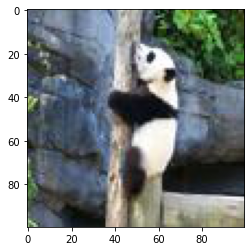

In [181]:
index = 63
plt.imshow(X_test[:,index].reshape((100, 100, 3)))
if int(a["Y_prediction_test"][0,index]) :
    print("its a panda!")
else :
    print("its not a panda!")

if y_test[0,index]:
    print("its actually a panda !")
else :
    print("its actually not a panda!")






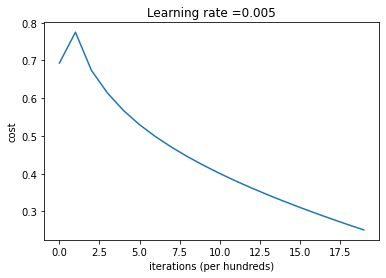

In [166]:
# Plot learning curve (with costs)
costs = np.squeeze(a['costs'])
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate =" + str(a["learning_rate"]))
plt.show()

# predict your own image

In [163]:
new_image="real.jpg"

image = np.array(Image.open(new_image).resize((100,100,3)))
plt.imshow(image)


FileNotFoundError: [Errno 2] No such file or directory: 'real.jpg'

# Set of weights  w1 , w2 ....... w30000

In [177]:
print(a["w"])
print(a["b"])

model_data = np.append(a["w"],a["b"])
np.savetxt('pandaClassifier_model_data.csv', model_data, delimiter=',')


[[-0.02359169]
 [-0.00735336]
 [-0.03184914]
 ...
 [-0.00194773]
 [-0.00766871]
 [-0.01240121]]
0.14303544871485033


# using these weights in the formula  : -
# f(x) = (w1*x1) + (w2*x2) + (w3*x3) +.......(wn*xn)  + B
# then sigmoid(f(x))
# we can get the prediction of any image to be panda or not 